<h1><center>Creating Pandas DataFrames from Lists and Dictionaries (orginal source: https://pbpython.com/pandas-list-dict.html by Practical Business Python
</center></h1>

In [3]:
import pandas as pd
# Define a list of dictionaries
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]
df = pd.DataFrame(sales) # Assign the list of dictionaries to a dataframe
df # display dataframe

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


In [4]:
# Define a dictionary of list
sales = {'account': ['Jones LLC', 'Alpha Co', 'Blue Inc'],
         'Jan': [150, 200, 50],
         'Feb': [200, 210, 90],
         'Mar': [140, 215, 95]}
df = pd.DataFrame.from_dict(sales) # Assign the dictionary of lists to a dataframe 
df # display dataframe

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


<h1><center>Slicing and Dicing - Extracting Columns and Rows from Dataframe</center></h1>

<h1><center>Scraping NBA Data
(<a href='http://savvastjortjoglou.com/nba-draft-part01-scraping.html' target='_blank'>Original Source:Scraping and Cleaning the NBA Draft by 
Savvas Tjortjoglou)</a></center></h1>

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import csv

url = "http://www.basketball-reference.com/draft/NBA_2014.html"
html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')
column_headers = []
for th in soup.findAll('tr',limit=2)[1].findAll('th'):
    column_headers.append(th.getText())
data_rows = soup.findAll('tr')[2:]  # skip the first 2 header rows
player_data = []  
for i in range(len(data_rows)):  # for each table row
    player_row = [] 
    # for each table data element from each table row
    for th in data_rows[i].findAll('th',limit=1):
        player_row.append(th.getText())
    for td in data_rows[i].findAll('td'):        
        # get the text content and append to the player_row 
        player_row.append(td.getText())        
    # then append each pick/player to the player_data matrix
    player_data.append(player_row)
df = pd.DataFrame(player_data, columns=column_headers)
df.to_csv('projects/nba.csv')
# print(df.shape)
# pd.set_option('display.max_rows', 62)
df.head(60)

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,1,CLE,Andrew Wiggins,Kansas,6,454,16242,8943,1977,...,.332,.732,35.8,19.7,4.4,2.3,15.0,.044,-1.9,0.2
1,2,2,MIL,Jabari Parker,Duke,6,280,8193,4208,1614,...,.324,.739,29.3,15.0,5.8,2.1,12.8,.075,-0.9,2.3
2,3,3,PHI,Joel Embiid,Kansas,4,202,6181,4864,2324,...,.322,.794,30.6,24.1,11.5,3.1,22.4,.174,4.5,10.0
3,4,4,ORL,Aaron Gordon,Arizona,6,399,11414,5082,2553,...,.318,.701,28.6,12.7,6.4,2.4,21.4,.090,-0.1,5.5
4,5,5,UTA,Dante Exum,,5,239,4429,1366,424,...,.308,.766,18.5,5.7,1.8,2.1,3.1,.034,-3.3,-1.5
5,6,6,BOS,Marcus Smart,Oklahoma State,6,394,11409,3888,1409,...,.318,.774,29.0,9.9,3.6,4.0,20.3,.086,-0.3,4.9
6,7,7,LAL,Julius Randle,Kentucky,6,375,10934,6032,3375,...,.295,.724,29.2,16.1,9.0,2.8,20.5,.090,-0.5,4.1
7,8,8,SAC,Nik Stauskas,Michigan,5,335,6662,2272,688,...,.353,.814,19.9,6.8,2.1,1.5,3.8,.028,-3.0,-1.7
8,9,9,CHH,Noah Vonleh,Indiana,6,332,5659,1655,1740,...,.310,.692,17.0,5.0,5.2,0.8,9.3,.079,-2.3,-0.5
9,10,10,PHI,Elfrid Payton,LA-Lafayette,6,387,11350,4247,1703,...,.289,.625,29.3,11.0,4.4,6.6,14.9,.063,-0.5,4.3


In [6]:
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,56,56.0,DEN,Devyn Marble,Iowa,2.0,44.0,457.0,97.0,...,0.222,0.375,10.4,2.2,1.6,0.7,-0.3,-0.028,-5.5,-0.4
58,58,57,57.0,IND,Louis Labeyrie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59,58,58.0,SAS,Jordan McRae,Tennessee,4.0,123.0,1696.0,846.0,...,0.355,0.772,13.8,6.9,1.8,1.4,1.7,0.048,-2.1,0.0
60,60,59,59.0,TOR,Xavier Thames,San Diego State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.index # show number of entries

RangeIndex(start=0, stop=62, step=1)

In [8]:
df.info() # show field names and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 23 columns):
Unnamed: 0    62 non-null int64
Rk            61 non-null object
Pk            60 non-null float64
Tm            60 non-null object
Player        60 non-null object
College       46 non-null object
Yrs           53 non-null float64
G             53 non-null float64
MP            53 non-null float64
PTS           53 non-null float64
TRB           53 non-null float64
AST           53 non-null float64
FG%           53 non-null float64
3P%           51 non-null float64
FT%           53 non-null float64
MP.1          53 non-null float64
PTS.1         53 non-null float64
TRB.1         53 non-null float64
AST.1         53 non-null float64
WS            53 non-null float64
WS/48         53 non-null float64
BPM           53 non-null float64
VORP          53 non-null float64
dtypes: float64(18), int64(1), object(4)
memory usage: 11.3+ KB


In [9]:
df.loc[0:6,'Rk':'Yrs'] # Slicing dataframe by row range and column range: df.loc[row range,column range]

,Rk,Pk,Tm,Player,College,Yrs
0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0
1,2,2.0,MIL,Jabari Parker,Duke,6.0
2,3,3.0,PHI,Joel Embiid,Kansas,4.0
3,4,4.0,ORL,Aaron Gordon,Arizona,6.0
4,5,5.0,UTA,Dante Exum,NaN,5.0
5,6,6.0,BOS,Marcus Smart,Oklahoma State,6.0
6,7,7.0,LAL,Julius Randle,Kentucky,6.0


In [10]:
# Notice the difference in indexing between Pandas Frame and data structures such as string and list.
x = "this is a string" 
print(x[0:6])
y = [1,2,3,4,5,6,7]
print(y[0:6])

this i
[1, 2, 3, 4, 5, 6]


In [11]:
df.loc[[0,2,4],['Rk','Tm','College']] # Selectively pick row 0,2&4 of column NBA_name, NBA_Pk, & NBA_Tm

,Rk,Tm,College
0,1,CLE,Kansas
2,3,PHI,Kansas
4,5,UTA,NaN


In [12]:
df.loc[0:4,['Player','College','Rk']] # Print the range from 0 to 4 of only column NBA_name, 
                                           # NBA_Pk, and NBA_Tm.

,Player,College,Rk
0,Andrew Wiggins,Kansas,1
1,Jabari Parker,Duke,2
2,Joel Embiid,Kansas,3
3,Aaron Gordon,Arizona,4
4,Dante Exum,NaN,5


In [13]:
# Finding null values
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,56,56.0,DEN,Devyn Marble,Iowa,2.0,44.0,457.0,97.0,...,0.222,0.375,10.4,2.2,1.6,0.7,-0.3,-0.028,-5.5,-0.4
58,58,57,57.0,IND,Louis Labeyrie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59,58,58.0,SAS,Jordan McRae,Tennessee,4.0,123.0,1696.0,846.0,...,0.355,0.772,13.8,6.9,1.8,1.4,1.7,0.048,-2.1,0.0
60,60,59,59.0,TOR,Xavier Thames,San Diego State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Display all the entries (i.e.rows) with the "college" column has null value
# Finding null values
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe
df[df['College'].isnull()]

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
11,11,12,12.0,ORL,Dario Šarić,NaN,4.0,298.0,7903.0,3625.0,...,0.356,0.835,26.5,12.2,6.2,2.1,13.9,0.084,-0.8,2.4
15,15,16,16.0,CHI,Jusuf Nurkić,NaN,5.0,310.0,7103.0,3608.0,...,0.071,0.666,22.9,11.6,8.0,1.9,16.4,0.111,0.2,3.9
19,19,20,20.0,TOR,Bruno Caboclo,NaN,6.0,96.0,1233.0,407.0,...,0.314,0.836,12.8,4.2,2.6,0.7,1.5,0.057,-2.4,-0.1
24,24,25,25.0,HOU,Clint Capela,NaN,6.0,334.0,8674.0,4075.0,...,0.000,0.526,26.0,12.2,9.7,1.0,36.4,0.201,1.9,8.6
26,26,27,27.0,PHO,Bogdan Bogdanović,NaN,3.0,201.0,5632.0,2674.0,...,0.370,0.803,28.0,13.3,3.2,3.5,8.0,0.068,-0.7,1.9
30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,Rk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,31,31.0,MIL,Damien Inglis,NaN,1.0,20.0,156.0,36.0,...,0.231,0.875,7.8,1.8,1.6,0.5,-0.1,-0.024,-5.6,-0.1
42,42,41,41.0,DEN,Nikola Jokić,NaN,5.0,373.0,10819.0,6319.0,...,0.338,0.825,29.0,16.9,9.7,5.4,48.0,0.213,7.2,25.0


In [15]:
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
filter = df["College"] != ""
dfNew = df[filter]
dfNew

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,56,56.0,DEN,Devyn Marble,Iowa,2.0,44.0,457.0,97.0,...,0.222,0.375,10.4,2.2,1.6,0.7,-0.3,-0.028,-5.5,-0.4
58,58,57,57.0,IND,Louis Labeyrie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59,58,58.0,SAS,Jordan McRae,Tennessee,4.0,123.0,1696.0,846.0,...,0.355,0.772,13.8,6.9,1.8,1.4,1.7,0.048,-2.1,0.0
60,60,59,59.0,TOR,Xavier Thames,San Diego State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Finding the number of null value for each field
dfNew.isnull().sum()

Unnamed: 0     0
Rk             1
Pk             2
Tm             2
Player         2
College       16
Yrs            9
G              9
MP             9
PTS            9
TRB            9
AST            9
FG%            9
3P%           11
FT%            9
MP.1           9
PTS.1          9
TRB.1          9
AST.1          9
WS             9
WS/48          9
BPM            9
VORP           9
dtype: int64

In [17]:
# Finding null values
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe
df1 = df.dropna(subset=['College'])
df1

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
5,5,6,6.0,BOS,Marcus Smart,Oklahoma State,6.0,394.0,11409.0,3888.0,...,0.318,0.774,29.0,9.9,3.6,4.0,20.3,0.086,-0.3,4.9
6,6,7,7.0,LAL,Julius Randle,Kentucky,6.0,375.0,10934.0,6032.0,...,0.295,0.724,29.2,16.1,9.0,2.8,20.5,0.090,-0.5,4.1
7,7,8,8.0,SAC,Nik Stauskas,Michigan,5.0,335.0,6662.0,2272.0,...,0.353,0.814,19.9,6.8,2.1,1.5,3.8,0.028,-3.0,-1.7
8,8,9,9.0,CHH,Noah Vonleh,Indiana,6.0,332.0,5659.0,1655.0,...,0.310,0.692,17.0,5.0,5.2,0.8,9.3,0.079,-2.3,-0.5
9,9,10,10.0,PHI,Elfrid Payton,LA-Lafayette,6.0,387.0,11350.0,4247.0,...,0.289,0.625,29.3,11.0,4.4,6.6,14.9,0.063,-0.5,4.3
10,10,11,11.0,DEN,Doug McDermott,Creighton,6.0,403.0,8040.0,3302.0,...,0.413,0.825,20.0,8.2,2.2,0.8,13.6,0.081,-2.1,-0.1


In [18]:
# Finding null values
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,56,56.0,DEN,Devyn Marble,Iowa,2.0,44.0,457.0,97.0,...,0.222,0.375,10.4,2.2,1.6,0.7,-0.3,-0.028,-5.5,-0.4
58,58,57,57.0,IND,Louis Labeyrie,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59,58,58.0,SAS,Jordan McRae,Tennessee,4.0,123.0,1696.0,846.0,...,0.355,0.772,13.8,6.9,1.8,1.4,1.7,0.048,-2.1,0.0
60,60,59,59.0,TOR,Xavier Thames,San Diego State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Drop All rows with Any Missing Value
df1 = df.dropna(axis=0)
df1

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
5,5,6,6.0,BOS,Marcus Smart,Oklahoma State,6.0,394.0,11409.0,3888.0,...,0.318,0.774,29.0,9.9,3.6,4.0,20.3,0.086,-0.3,4.9
6,6,7,7.0,LAL,Julius Randle,Kentucky,6.0,375.0,10934.0,6032.0,...,0.295,0.724,29.2,16.1,9.0,2.8,20.5,0.090,-0.5,4.1
7,7,8,8.0,SAC,Nik Stauskas,Michigan,5.0,335.0,6662.0,2272.0,...,0.353,0.814,19.9,6.8,2.1,1.5,3.8,0.028,-3.0,-1.7
8,8,9,9.0,CHH,Noah Vonleh,Indiana,6.0,332.0,5659.0,1655.0,...,0.310,0.692,17.0,5.0,5.2,0.8,9.3,0.079,-2.3,-0.5
9,9,10,10.0,PHI,Elfrid Payton,LA-Lafayette,6.0,387.0,11350.0,4247.0,...,0.289,0.625,29.3,11.0,4.4,6.6,14.9,0.063,-0.5,4.3
10,10,11,11.0,DEN,Doug McDermott,Creighton,6.0,403.0,8040.0,3302.0,...,0.413,0.825,20.0,8.2,2.2,0.8,13.6,0.081,-2.1,-0.1


In [29]:
# Display all the entries (i.e.rows) with the "college" column has null value
# Finding null values
import pandas as pd
df = pd.read_csv("projects/nba.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe
df[df['College'].isnull()]

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5
11,11,12,12.0,ORL,Dario Šarić,NaN,4.0,298.0,7903.0,3625.0,...,0.356,0.835,26.5,12.2,6.2,2.1,13.9,0.084,-0.8,2.4
15,15,16,16.0,CHI,Jusuf Nurkić,NaN,5.0,310.0,7103.0,3608.0,...,0.071,0.666,22.9,11.6,8.0,1.9,16.4,0.111,0.2,3.9
19,19,20,20.0,TOR,Bruno Caboclo,NaN,6.0,96.0,1233.0,407.0,...,0.314,0.836,12.8,4.2,2.6,0.7,1.5,0.057,-2.4,-0.1
24,24,25,25.0,HOU,Clint Capela,NaN,6.0,334.0,8674.0,4075.0,...,0.000,0.526,26.0,12.2,9.7,1.0,36.4,0.201,1.9,8.6
26,26,27,27.0,PHO,Bogdan Bogdanović,NaN,3.0,201.0,5632.0,2674.0,...,0.370,0.803,28.0,13.3,3.2,3.5,8.0,0.068,-0.7,1.9
30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,Rk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,31,31.0,MIL,Damien Inglis,NaN,1.0,20.0,156.0,36.0,...,0.231,0.875,7.8,1.8,1.6,0.5,-0.1,-0.024,-5.6,-0.1
42,42,41,41.0,DEN,Nikola Jokić,NaN,5.0,373.0,10819.0,6319.0,...,0.338,0.825,29.0,16.9,9.7,5.4,48.0,0.213,7.2,25.0


In [30]:
df[df['Pk'].isnull()]

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,Rk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df[df['G'] > 400]

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
10,10,11,11.0,DEN,Doug McDermott,Creighton,6.0,403.0,8040.0,3302.0,...,0.413,0.825,20.0,8.2,2.2,0.8,13.6,0.081,-2.1,-0.1
40,40,39,39.0,PHI,Jerami Grant,Syracuse,6.0,447.0,10909.0,4111.0,...,0.348,0.666,24.4,9.2,3.9,1.1,22.3,0.098,-0.9,3.1
47,47,46,46.0,WAS,Jordan Clarkson,Missouri,6.0,445.0,12054.0,6573.0,...,0.341,0.818,27.1,14.8,3.2,2.6,14.0,0.056,-0.7,3.9


<h1><center>Renaming the Columns</center></h1>

In [33]:
df.rename(columns={'WS/48':'WS_per_48'}, inplace=True)
df.head()

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS_per_48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5


In [34]:
# get the column names and replace all '%' with '_Perc'
df.columns = df.columns.str.replace('_Perc', '_Percent')
df.head()

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS_per_48,BPM,VORP
0,0,1,1.0,CLE,Andrew Wiggins,Kansas,6.0,454.0,16242.0,8943.0,...,0.332,0.732,35.8,19.7,4.4,2.3,15.0,0.044,-1.9,0.2
1,1,2,2.0,MIL,Jabari Parker,Duke,6.0,280.0,8193.0,4208.0,...,0.324,0.739,29.3,15.0,5.8,2.1,12.8,0.075,-0.9,2.3
2,2,3,3.0,PHI,Joel Embiid,Kansas,4.0,202.0,6181.0,4864.0,...,0.322,0.794,30.6,24.1,11.5,3.1,22.4,0.174,4.5,10.0
3,3,4,4.0,ORL,Aaron Gordon,Arizona,6.0,399.0,11414.0,5082.0,...,0.318,0.701,28.6,12.7,6.4,2.4,21.4,0.090,-0.1,5.5
4,4,5,5.0,UTA,Dante Exum,NaN,5.0,239.0,4429.0,1366.0,...,0.308,0.766,18.5,5.7,1.8,2.1,3.1,0.034,-3.3,-1.5


In [35]:
df.dtypes  # Take a look at data typse in each column

Unnamed: 0      int64
Rk             object
Pk            float64
Tm             object
Player         object
College        object
Yrs           float64
G             float64
MP            float64
PTS           float64
TRB           float64
AST           float64
FG%           float64
3P%           float64
FT%           float64
MP.1          float64
PTS.1         float64
TRB.1         float64
AST.1         float64
WS            float64
WS_per_48     float64
BPM           float64
VORP          float64
dtype: object

<h1><center>Eliminate Null Values </center></h1>

<h1><center>Pandas dropna – Drop Null/NA Values from DataFrame (Source: https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe) </center></h1>

In [75]:
# Pandas Drop All Rows with any Null/NaN/NaT Values
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, 4], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', None, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

# drop all rows with any NaN and NaT values
df1 = df.dropna() # same as df.dropna(axis=0)
print(df1)

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT   NaT
     Name  ID Salary Role
0  Pankaj   1    100  CEO


In [47]:
# Drop All Columns with Any Missing Value
df1 = df.dropna(axis=1)
print(df1)

     Name  ID
0  Pankaj   1
1  Meghna   2
2   David   3
3    Lisa   4


In [49]:
# Drop Row/Column Only if All the Values are Null
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, 3, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(how='all')
print(df1)

df2 = df.dropna(how='all', axis=1)
print(df2)

     Name   ID Salary Role
0  Pankaj    1    100  NaT
1  Meghna    2    200  NaT
2   David    3    NaN  NaT
3     NaT  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT
2   David  3    NaN  NaT
     Name   ID Salary
0  Pankaj    1    100
1  Meghna    2    200
2   David    3    NaN
3     NaT  NaT    NaT


In [50]:
# DataFrame Drop Rows/Columns when the threshold of null values is crossed
d1 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, pd.NaT, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(thresh=2)
print(df1)

     Name   ID Salary Role
0  Pankaj    1    100  NaT
1  Meghna    2    200  NaT
2   David  NaT    NaN  NaT
3     NaT  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT


In [51]:
# Define Labels to look for null values
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(subset=['ID'])
print(df1)

     Name   ID Salary Role
0  Pankaj    1    100  CEO
1  Meghna    2    200  NaN
2   David    3    NaN  NaT
3    Lisa  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  CEO
1  Meghna  2    200  NaN
2   David  3    NaN  NaT


<h1><center>Eliminate Dublicate Values </center></h1>

<h1><center>Find the duplicate rows of the dataframe in python pandas (Source:http://www.datasciencemadesimple.com/find-duplicate-rows-dataframe-python-pandas/)</center></h1>

In [27]:
# import pandas as pd
import numpy as np
 
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
       'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [28]:
df["is_duplicate"]= df.duplicated()
df

,Name,Age,Score,is_duplicate
0,Alisa,26,85,False
1,Bobby,24,63,False
2,jodha,23,55,False
3,jack,22,74,False
4,raghu,23,31,False
5,Cathrine,24,77,False
6,Alisa,26,85,True
7,Bobby,24,63,True
8,kumar,22,42,False
9,Alisa,23,62,False


In [104]:
df_removed=df.loc[0:11,'Name':'Score']
df_removed

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [105]:
df = df_removed.drop_duplicates()
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


<h1><center>Learning Matplotlib</center></h1>

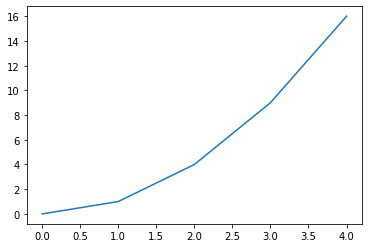

In [40]:
from matplotlib import pyplot as plt
x_values = [0, 1, 2, 3, 4]
y_values = [0, 1, 4, 9, 16]
plt.plot(x_values, y_values)
plt.show()

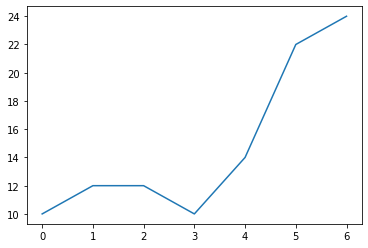

In [66]:
from matplotlib import pyplot as plt
days = range(7)
money_spent = [10,12,12,10,14,22,24]
plt.plot(days,money_spent)
plt.show()

# Creating plot style by varying colors, linestyles, and markers.
# Add clarity to the visualization by using title, label and legend.

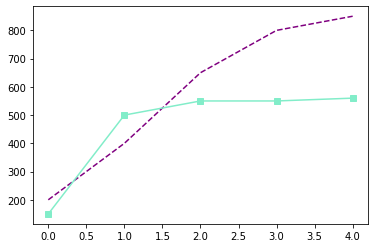

In [67]:
from matplotlib import pyplot as plt
time = [0, 1, 2, 3, 4]
revenue = [200, 400, 650, 800, 850]
costs = [150, 500, 550, 550, 560]
plt.plot(time, revenue, color='purple',linestyle='--')
plt.plot(time, costs, color='#82edc9',marker='s')
plt.show()

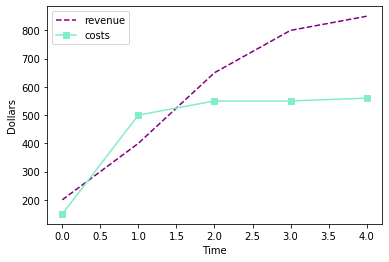

In [69]:
from matplotlib import pyplot as plt
time = [0, 1, 2, 3, 4]
revenue = [200, 400, 650, 800, 850]
costs = [150, 500, 550, 550, 560]
plt.plot(time, revenue, color='purple',linestyle='--')
plt.plot(time, costs, color='#82edc9',marker='s')
plt.xlabel('Time')
plt.ylabel('Dollars')
plt.legend(['revenue', 'costs'])
plt.show()

<h1><center>Basic Descriptive Statistic Functions in Python</center></h1>

In [37]:
# Compare Numpy and Scipy statistical functions and my own functions 
import numpy as np
from scipy import stats

def round(x):
    pos = str(x).find(".")+1
    val = str(x)[pos:pos+1]
    if (int(val) >= 5):
        return(str(x+1)[0:pos-1])
    else:
        return(str(x)[0:pos-1])

def average_calc(list):
    total = 0
    counter = 0
    for i in list:
        total = total + i
        # print(counter,i)
        counter = counter + 1
    # print ("total:",total)
    # print("no. of items:",counter)
    return(total/counter)

def median_calc(list):
    sorted_list = sorted(list)
    # print("sorted list:",sorted_list)
    result = 0
    position = int(round(len(sorted_list) / 2))
    if len(sorted_list) % 2 == 0:
        # print("even")
        result = (sorted_list[position-1] + sorted_list[position]) / 2 
    else:
        # print("odd")
        result = sorted_list[position-1]    
    return(result)

def mode_calc(list):
    list = sorted(list)
    list_count = []
    highest_count = 0
    for i in list:
        if list.count(i) >= highest_count:  
                list_count.append([i,list.count(i)])
                highest_count = list.count(i)
    return(list_count)

def variance_calc(list):
  average = average_calc(list)
  variance = 0
  for item in list:
    variance = variance + (average - item) ** 2
  return variance/len(list)

def std_deviation_calc(variance):
  return variance ** 0.5


average = 0
media = 0
mode = 0
# list = [60,70,20,30,40,40,50,80]
list = [60,70,20,60,40,50,70,20]

average = average_calc(list)
print("mean:",average)
print("numpy mean:",np.mean(list))
median = median_calc(list)
print("median",median)
print("numpy median:",np.median(list))
mode = mode_calc(list)
print("mode",mode)
print("scipy mode:",stats.mode(list))
variance = variance_calc(list)
print("variance:",variance)
print("numpy variance:",np.var(list))
std_deviation = std_deviation_calc(variance)
print("standard deviation:",std_deviation)
print("numpy standard deviation:",np.std(list))

mean: 48.75
numpy mean: 48.75
median 55.0
numpy median: 55.0
mode [[20, 2], [20, 2], [60, 2], [60, 2], [70, 2], [70, 2]]
scipy mode: ModeResult(mode=array([20]), count=array([2]))
variance: 360.9375
numpy variance: 360.9375
standard deviation: 18.99835519196333
numpy standard deviation: 18.99835519196333


In [71]:
import numpy as np

grades = [88, 82, 85, 84, 90]
mean = np.mean(grades)

difference_one = 88 - mean
difference_two = 82 - mean
difference_three = 85 - mean
difference_four = 84 - mean
difference_five = 90 - mean

print("difference_one:",difference_one)
print("difference_two:",difference_two)
print("difference_three:",difference_three)
print("difference_four:",difference_four)
print("difference_five:",difference_five)
#Part 1: Sum the differences
difference_sum = difference_one + difference_two + difference_three + difference_four + difference_five 

#Part 2: Average the differences
average_difference = difference_sum / 5

#IGNORE CODE BELOW HERE
print("The sum of the differences is " + str(format(difference_sum, "f")))
print("The average difference is " + str(format(average_difference, "f")))

difference_one: 2.200000000000003
difference_two: -3.799999999999997
difference_three: -0.7999999999999972
difference_four: -1.7999999999999972
difference_five: 4.200000000000003
The sum of the differences is 0.000000
The average difference is 0.000000


In [72]:
import numpy as np

grades = [88, 82, 85, 84, 90]
mean = np.mean(grades)

#When calculating these variables, square the difference.
difference_one = (88 - mean)**2
difference_two = (82 - mean)**2
difference_three = (85 - mean)**2
difference_four = (84 - mean)**2
difference_five = (90 - mean)**2

difference_sum = difference_one + difference_two + difference_three + difference_four + difference_five

variance = (difference_sum / 5) 

print("The sum of the squared differences is " + str(difference_sum))
print("The variance is " + str(variance))

The sum of the squared differences is 40.8
The variance is 8.16


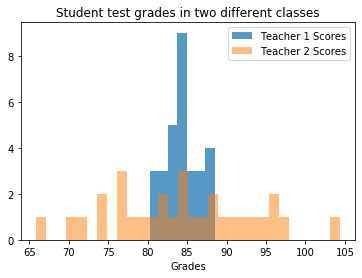

The mean of the test scores in teacher one's class is 84.46766666666666
The mean of the test scores in teacher two's class is 84.29799999999999
The variance of the test scores in teacher one's class is 4.266517888888889
The variance of the test scores in teacher two's class is 78.13198933333337


In [73]:
import numpy as np
import matplotlib.pyplot as plt

teacher_one_grades = [80.24, 81.15, 81.29, 82.12, 82.52, 82.54, 82.76, 83.37, 83.42, 83.45, 83.47, 83.79, 83.91, 83.98, 84.03, 84.69, 84.74, 84.89, 84.95, 84.95, 85.02, 85.18, 85.53, 86.29, 86.83, 87.29, 87.47, 87.62, 88.04, 88.5]
teacher_two_grades = [65.82, 70.77, 71.46, 73.63, 74.62, 76.53, 76.86, 77.06, 78.46, 79.81, 80.64, 81.61, 81.84, 83.67, 84.44, 84.73, 84.74, 85.15, 86.55, 88.06, 88.53, 90.12, 91.27, 91.62, 92.86, 94.37, 95.64, 95.99, 97.69, 104.4]

#Set these two variables equal to the variance of each dataset using NumPy
teacher_one_variance = np.var(teacher_one_grades)
teacher_two_variance = np.var(teacher_two_grades)


#IGNORE THE CODE BELOW HERE
plt.hist(teacher_one_grades, alpha = 0.75, label = "Teacher 1 Scores", bins = 7)
plt.hist(teacher_two_grades, alpha = 0.5, label = "Teacher 2 Scores", bins = 30)
plt.title("Student test grades in two different classes")
plt.xlabel("Grades")
plt.legend()
plt.show()

print("The mean of the test scores in teacher one's class is " + str(np.mean(teacher_one_grades)))
print("The mean of the test scores in teacher two's class is " + str(np.mean(teacher_two_grades)))

print("The variance of the test scores in teacher one's class is " +str(teacher_one_variance))
print("The variance of the test scores in teacher two's class is " +str(teacher_two_variance))
